In [77]:
!git clone https://github.com/DeneZiZZ/eeg-igt.git

fatal: destination path 'eeg-igt' already exists and is not an empty directory.


In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **1. Dataset Loading**

In [79]:
os.chdir("/content/eeg-igt/Data")
os.getcwd()

'/content/eeg-igt/Data'

In [80]:
igt01 = pd.read_csv('S01.edf.mrk')
igt02 = pd.read_csv('S02.edf.mrk')
igt03 = pd.read_csv('S03.edf.mrk')
igt04 = pd.read_csv('S04.edf.mrk')
igt05 = pd.read_csv('S05.edf.mrk')
igt06 = pd.read_csv('S06.edf.mrk')
igt07 = pd.read_csv('S07.edf.mrk')
igt08 = pd.read_csv('S08.edf.mrk')
igt09 = pd.read_csv('S09.edf.mrk')
igt10 = pd.read_csv('S10.edf.mrk')
igt11 = pd.read_csv('S11.edf.mrk')
igt12 = pd.read_csv('S12.edf.mrk')
igt13 = pd.read_csv('S13.edf.mrk')
igt14 = pd.read_csv('S14.edf.mrk')
igt15 = pd.read_csv('S15.edf.mrk')
igt16 = pd.read_csv('S16.edf.mrk')
igt17 = pd.read_csv('S17.edf.mrk')
igt18 = pd.read_csv('S18.edf.mrk')
igt19 = pd.read_csv('S19.edf.mrk')
igt20 = pd.read_csv('S20.edf.mrk')

***The experiment is 200 trials (10 Blocks) IGT version***

REDME.txt:
* PP5 : fixation cross
* PP1-2-3-4 : Selection of the deck 1-2-3 or 4
* PP7 : Display of the amount of money
* PP8 : Display of the fixation  cross before the result
* PP9 : Display of the letter when it is a win (P or V)
* PP10 : Display of the letter when it is a loss (P or V)

# **2. IGT Function**

In [81]:
def IGT(data):
    # IGT files loading
    data = data.TL02.str.split(r'\t', expand=True) # dividing by columns; !!!the whole dataset is more than 200 trials (201)!!!
    # dataset has three columns. Two of them are identical, name them as Time and Time1. The third populates by simbols PP1 - PP10. Name it as Mark
    data.columns = ['Time', 'Time1', 'Mark'] # rename columns
    data.drop('Time1', axis = 1, inplace = True) # drop colunm "0"

    # Sort decision time points (DTP) only that is match of card selection times PP1, PP2, PP3, and PP4
    igt1 = data[(data.Mark == '"PP 1"') | (data.Mark == '"PP 2"') | (data.Mark == '"PP 3"') | (data.Mark == '"PP 4"')]
    igt1.columns = ['DTP', 'Deck'] # name columns
    igt1 = igt1.reset_index(drop = True)

    # Dividing dataset by 10 Blocks, 20 trials each
    igt1['Block'] = pd.DataFrame(np.repeat(np.arange(0, 10), 20))
    igt1 = igt1.dropna(axis=0, how='any') # erasing NaN rows

    # Sort reaction time points (RTP), rows with PP9 or PP10 marks
    # PP9 - win
    # PP10 - loss
    igt2 = data[(data.Mark == '"PP 9"') | (data.Mark == '"PP 10"')]
    igt2.columns = ['RTP', 'Result'] # name columns
    igt2 = igt2.reset_index(drop = True)

    # DTP and RTP combining in one IGT dataset
    igt = igt1.join(igt2)
    igt = igt.fillna(method='ffill')

    # Rename decks as A, B, C, and D and win/loss results as 1 or 0
    igt['RTP'] = igt['RTP'].astype(str).astype(int)
    igt['DTP'] = igt['DTP'].astype(str).astype(int)
    igt.loc[(igt.Deck == '"PP 1"'), 'Deck'] = 'A'
    igt.loc[(igt.Deck == '"PP 2"'), 'Deck'] = 'B'
    igt.loc[(igt.Deck == '"PP 3"'), 'Deck'] = 'C' 
    igt.loc[(igt.Deck == '"PP 4"'), 'Deck'] = 'D'
    igt.loc[(igt.Result == '"PP 9"'), 'Result'] = '1' 
    igt.loc[(igt.Result == '"PP 10"'), 'Result'] = '0'
    
    # Dividing by IGT blocks
    igtBlock1 = igt[0:20]
    igtBlock2 = igt[20:40]
    igtBlock3 = igt[40:60]
    igtBlock4 = igt[60:80]
    igtBlock5 = igt[80:100]
    igtBlock6 = igt[100:120]
    igtBlock7 = igt[120:140]
    igtBlock8 = igt[140:160]
    igtBlock9 = igt[160:180]
    igtBlock10 = igt[180:200]

    # IGT Score calculation

    igtBlock1A = igtBlock1[(igtBlock1.Deck == 'A')]
    igtBlock1B = igtBlock1[(igtBlock1.Deck == 'B')]
    igtBlock1C = igtBlock1[(igtBlock1.Deck == 'C')]
    igtBlock1D = igtBlock1[(igtBlock1.Deck == 'D')]

    igtBlock2A = igtBlock2[(igtBlock2.Deck == 'A')]
    igtBlock2B = igtBlock2[(igtBlock2.Deck == 'B')]
    igtBlock2C = igtBlock2[(igtBlock2.Deck == 'C')]
    igtBlock2D = igtBlock2[(igtBlock2.Deck == 'D')]

    igtBlock3A = igtBlock3[(igtBlock3.Deck == 'A')]
    igtBlock3B = igtBlock3[(igtBlock3.Deck == 'B')]
    igtBlock3C = igtBlock3[(igtBlock3.Deck == 'C')]
    igtBlock3D = igtBlock3[(igtBlock3.Deck == 'D')]

    igtBlock4A = igtBlock4[(igtBlock4.Deck == 'A')]
    igtBlock4B = igtBlock4[(igtBlock4.Deck == 'B')]
    igtBlock4C = igtBlock4[(igtBlock4.Deck == 'C')]
    igtBlock4D = igtBlock4[(igtBlock4.Deck == 'D')]

    igtBlock5A = igtBlock5[(igtBlock5.Deck == 'A')]
    igtBlock5B = igtBlock5[(igtBlock5.Deck == 'B')]
    igtBlock5C = igtBlock5[(igtBlock5.Deck == 'C')]
    igtBlock5D = igtBlock5[(igtBlock5.Deck == 'D')]
    
    igtBlock6A = igtBlock6[(igtBlock6.Deck == 'A')]
    igtBlock6B = igtBlock6[(igtBlock6.Deck == 'B')]
    igtBlock6C = igtBlock6[(igtBlock6.Deck == 'C')]
    igtBlock6D = igtBlock6[(igtBlock6.Deck == 'D')]
    
    igtBlock7A = igtBlock7[(igtBlock7.Deck == 'A')]
    igtBlock7B = igtBlock7[(igtBlock7.Deck == 'B')]
    igtBlock7C = igtBlock7[(igtBlock7.Deck == 'C')]
    igtBlock7D = igtBlock7[(igtBlock7.Deck == 'D')]

    igtBlock8A = igtBlock8[(igtBlock8.Deck == 'A')]
    igtBlock8B = igtBlock8[(igtBlock8.Deck == 'B')]
    igtBlock8C = igtBlock8[(igtBlock8.Deck == 'C')]
    igtBlock8D = igtBlock8[(igtBlock8.Deck == 'D')]

    igtBlock9A = igtBlock9[(igtBlock9.Deck == 'A')]
    igtBlock9B = igtBlock9[(igtBlock9.Deck == 'B')]
    igtBlock9C = igtBlock9[(igtBlock9.Deck == 'C')]
    igtBlock9D = igtBlock9[(igtBlock9.Deck == 'D')]

    igtBlock10A = igtBlock10[(igtBlock10.Deck == 'A')]
    igtBlock10B = igtBlock10[(igtBlock10.Deck == 'B')]
    igtBlock10C = igtBlock10[(igtBlock10.Deck == 'C')]
    igtBlock10D = igtBlock10[(igtBlock10.Deck == 'D')]
    
    # IGTscore = sum(C) + sum(D) - sum(A) - sum(B) by blocks
    igtBlock1Score = igtBlock1C.shape[0] + igtBlock1D.shape[0] - igtBlock1A.shape[0] - igtBlock1B.shape[0]
    igtBlock2Score = igtBlock2C.shape[0] + igtBlock2D.shape[0] - igtBlock2A.shape[0] - igtBlock2B.shape[0]
    igtBlock3Score = igtBlock3C.shape[0] + igtBlock3D.shape[0] - igtBlock3A.shape[0] - igtBlock3B.shape[0]
    igtBlock4Score = igtBlock4C.shape[0] + igtBlock4D.shape[0] - igtBlock4A.shape[0] - igtBlock4B.shape[0]
    igtBlock5Score = igtBlock5C.shape[0] + igtBlock5D.shape[0] - igtBlock5A.shape[0] - igtBlock5B.shape[0]
    igtBlock6Score = igtBlock6C.shape[0] + igtBlock6D.shape[0] - igtBlock6A.shape[0] - igtBlock6B.shape[0]
    igtBlock7Score = igtBlock7C.shape[0] + igtBlock7D.shape[0] - igtBlock7A.shape[0] - igtBlock7B.shape[0]
    igtBlock8Score = igtBlock8C.shape[0] + igtBlock8D.shape[0] - igtBlock8A.shape[0] - igtBlock8B.shape[0]
    igtBlock9Score = igtBlock9C.shape[0] + igtBlock9D.shape[0] - igtBlock9A.shape[0] - igtBlock9B.shape[0]
    igtBlock10Score = igtBlock10C.shape[0] + igtBlock10D.shape[0] - igtBlock10A.shape[0] - igtBlock10B.shape[0]

    # Collect IGTscore in one row
    IGTScore = [igtBlock1Score, igtBlock2Score, igtBlock3Score, igtBlock4Score, igtBlock5Score, igtBlock6Score, igtBlock7Score, igtBlock8Score, igtBlock9Score, igtBlock10Score]
    IGTScore = pd.DataFrame(IGTScore)
    
    return IGTScore

# **3. IGT Data Analysis**

In [82]:
# IGT function application to each dataset 
IGTScore01 = IGT(igt01)
IGTScore02 = IGT(igt02)
IGTScore03 = IGT(igt03)
IGTScore04 = IGT(igt04)
IGTScore05 = IGT(igt05)
IGTScore06 = IGT(igt06)
IGTScore07 = IGT(igt07)
IGTScore08 = IGT(igt08)
IGTScore09 = IGT(igt09)
IGTScore10 = IGT(igt10)
IGTScore11 = IGT(igt11)
IGTScore12 = IGT(igt12)
IGTScore13 = IGT(igt13)
IGTScore14 = IGT(igt14)
IGTScore15 = IGT(igt15)
IGTScore16 = IGT(igt16)
IGTScore17 = IGT(igt17)
IGTScore18 = IGT(igt18)
IGTScore19 = IGT(igt19)
IGTScore20 = IGT(igt20)

In [83]:
# combining 20 datasets in one dataframe
IGTScoreTotal = pd.concat([IGTScore01, 
                           IGTScore02,
                           IGTScore03, 
                           IGTScore04, 
                           IGTScore05,
                           IGTScore06, 
                           IGTScore07, 
                           IGTScore08, 
                           IGTScore09,
                           IGTScore10, 
                           IGTScore11, 
                           IGTScore12, 
                           IGTScore13,
                           IGTScore14, 
                           IGTScore15, 
                           IGTScore16, 
                           IGTScore17,
                           IGTScore18, 
                           IGTScore19, 
                           IGTScore20], axis=1)

IGTScoreTotal_T = IGTScoreTotal.T
IGTScoreTotal_T.columns = ('1','2','3','4','5','6','7','8','9','10') # Name 10 Blocks
IGTScoreTotal_T_i = IGTScoreTotal_T.reset_index(drop = True)

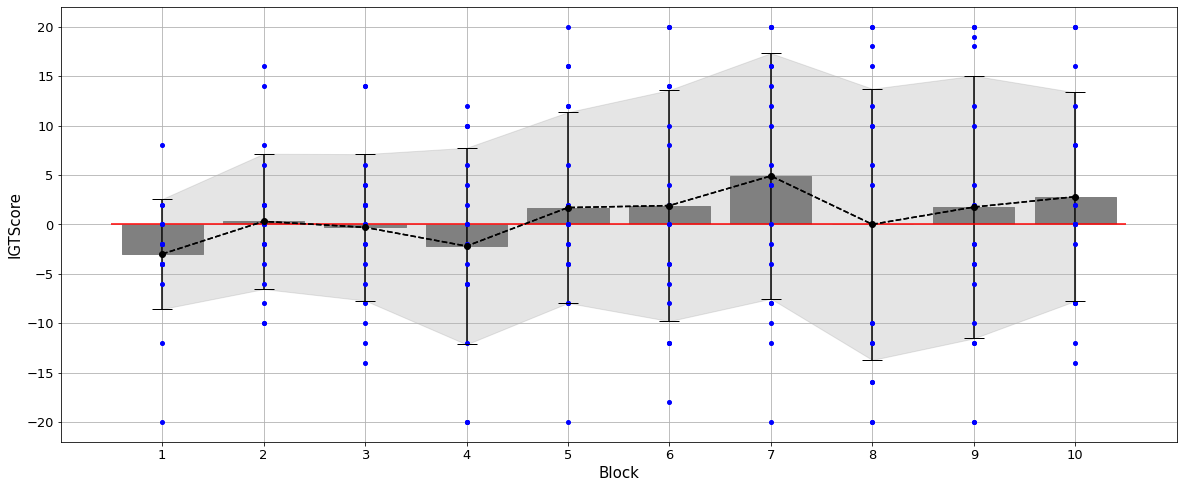

In [84]:
# The total experiment IGT performance

plt.figure(figsize=(20, 8))

# Scatterplot
plt.plot(np.arange(0, 10), 
         IGTScoreTotal, 
         'o', 
         markersize=4, 
         c="blue")
# Calculate the average
plt.plot(IGTScoreTotal_T_i.mean(axis=0), 
         marker='o', 
         color='black',
         linestyle='dashed')

plt.bar(np.arange(0, 10), 
        IGTScoreTotal_T_i.mean(axis=0), 
        edgecolor='gray', 
        linewidth=1, 
        facecolor = 'gray')

# Calculate the standard deviation
plt.errorbar(np.arange(0, 10), 
             IGTScoreTotal_T_i.mean(axis=0), 
             yerr=IGTScoreTotal_T_i.std(axis=0),
             capsize=10, 
             color='black',
             linestyle='dashed')

plt.fill_between(np.arange(0, 10),
               (IGTScoreTotal_T_i.mean(axis=0) + IGTScoreTotal_T_i.std(axis=0)),
               IGTScoreTotal_T_i.mean(axis=0) - IGTScoreTotal_T_i.std(axis=0),
               color='gray', 
               alpha=0.2)

plt.hlines(0, -0.5, 9.5, colors='red', linestyles='solid')
plt.xlabel('Block', size='15')
plt.ylabel('IGTScore', size='15')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.grid()

plt.show()

In [85]:
mask_NO = IGTScoreTotal_T_i.sum(axis=1) >= 10 # no gamblers/healthy participants, IGT score >= 10
mask_YES = IGTScoreTotal_T_i.sum(axis=1) < 10 # gamblers/addicted participants, IGT score < 10

IGTScore_NO = IGTScoreTotal_T_i[mask_NO]
IGTScore_YES = IGTScoreTotal_T_i[mask_YES]

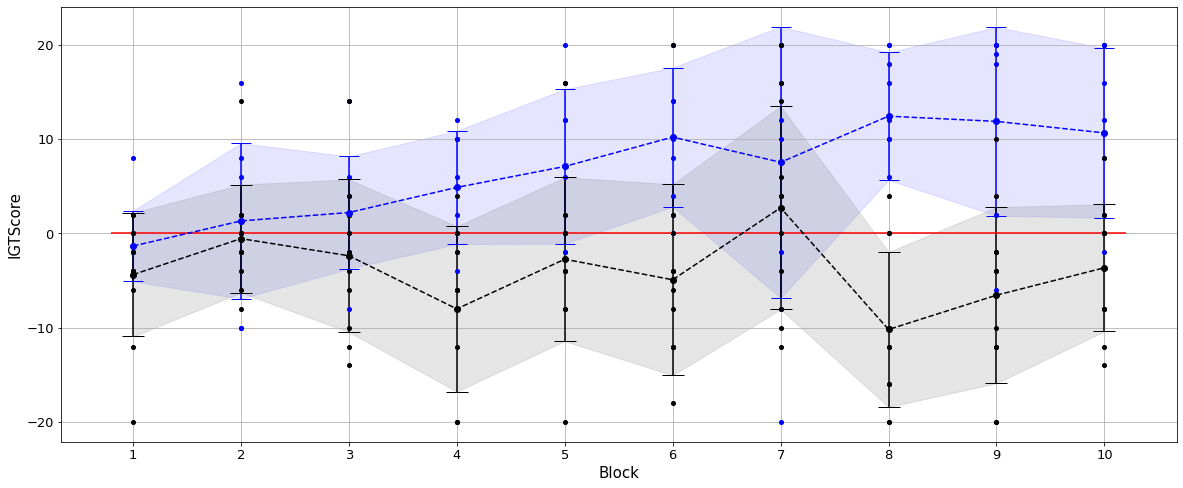

In [86]:
plt.figure(figsize=(20, 8))
plt.xticks(range(1, 11))

# Scatterplot
plt.plot(np.arange(1, 11), 
         IGTScore_NO.T, 
         'o', 
         markersize=4, 
         c="blue")

plt.plot(np.arange(1, 11), 
         IGTScore_YES.T, 
         'o', 
         markersize=4, 
         c="black")

# Define error bar, mean, and std
plt.errorbar(np.arange(1, 11), 
             IGTScore_NO.mean(axis=0), 
             yerr=IGTScore_NO.std(axis=0),
             capsize=10, 
             fmt='o',
             color='blue',
             linestyle='dashed')

plt.errorbar(np.arange(1, 11), 
             IGTScore_YES.mean(axis=0), 
             yerr=IGTScore_YES.std(axis=0),
             capsize=11, 
             fmt='o',
             color='black',
             linestyle='dashed')

plt.fill_between(np.arange(1, 11),
               (IGTScore_NO.mean(axis=0) + IGTScore_NO.std(axis=0)),
                IGTScore_NO.mean(axis=0) - IGTScore_NO.std(axis=0),
                color='blue', 
                alpha=0.1)

plt.fill_between(np.arange(1, 11),
                (IGTScore_YES.mean(axis=0) + IGTScore_YES.std(axis=0)),
                 IGTScore_YES.mean(axis=0) - IGTScore_YES.std(axis=0),
                 color='gray', 
                 alpha=0.2)

plt.hlines(0, 0.8, 10.2, colors='red', linestyles='solid')
plt.xlabel('Block', size='15')
plt.ylabel('IGTScore', size='15')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.grid()

plt.show()

In [87]:
# File with index 0, 1 creation

IGTScoreTotal_T_i_sum = IGTScoreTotal_T_i
IGTScoreTotal_T_i_sum['sum'] = IGTScoreTotal_T_i_sum.sum(axis=1)

IGTScoreTotal_T_i_sum.loc[IGTScoreTotal_T_i_sum['sum'] < 10, 'index'] = '0'
IGTScoreTotal_T_i_sum.loc[IGTScoreTotal_T_i_sum['sum'] >= 10, 'index'] = '1'

Index = pd.DataFrame(IGTScoreTotal_T_i_sum['index'])